In [26]:
import heapq
import collections

class Node:
    def __init__(self, symbol, frequency):
        self.symbol = symbol
        self.frequency = frequency
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.frequency < other.frequency

def build_huffman_tree(frequencies):
    heap = [Node(sym, freq) for sym, freq in frequencies.items()]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        parent = Node(None, left.frequency + right.frequency)
        parent.left = left
        parent.right = right
        heapq.heappush(heap, parent)

    return heap[0]

def build_huffman_codebook(node, prefix="", codebook=None):
    if codebook is None:
        codebook = {}
    if node is not None:
        if node.symbol is not None:
            codebook[node.symbol] = prefix
        build_huffman_codebook(node.left, prefix + "0", codebook)
        build_huffman_codebook(node.right, prefix + "1", codebook)
    return codebook

def huffman_encode(image, codebook):
    encoded_data = ""
    for row in image:
        for pixel in row:
            encoded_data += codebook[pixel]
    return encoded_data

def huffman_decode(encoded_data, huffman_tree):
    decoded_image = []
    current_node = huffman_tree
    for bit in encoded_data:
        if bit == '0':
            current_node = current_node.left
        else:
            current_node = current_node.right
        if current_node.symbol is not None:
            decoded_image.append(current_node.symbol)
            current_node = huffman_tree
    return decoded_image

# Creating a random 8x8 image with pixel intensities (symbols)
import random

symbols = [random.randint(0, 255) for _ in range(64)]
image = [symbols[i:i+8] for i in range(0, 64, 8)]

# Calculate symbol frequencies
symbol_frequencies = collections.Counter(symbols)

# Build Huffman tree and codebook
huffman_tree = build_huffman_tree(symbol_frequencies)
huffman_codebook = build_huffman_codebook(huffman_tree)

# Encode the image
encoded_data = huffman_encode(image, huffman_codebook)

# Decode the encoded data
decoded_image = huffman_decode(encoded_data, huffman_tree)

# Ensure the decoded image matches the original image
assert decoded_image == symbols

# Print the results
print("Original Image:")
for row in image:
    print(row)
print("\nHuffman Codebook:")
print(huffman_codebook)
print("\nEncoded Data:")
print(encoded_data)
print("\nDecoded Image:")
decoded_image_2d = [decoded_image[i:i+8] for i in range(0, 64, 8)]
for row in decoded_image_2d:
    print(row)

Original Image:
[115, 103, 215, 202, 110, 69, 204, 38]
[60, 102, 83, 167, 184, 147, 107, 218]
[35, 153, 69, 145, 113, 138, 70, 35]
[194, 140, 57, 252, 112, 156, 1, 102]
[21, 222, 116, 189, 35, 203, 204, 53]
[40, 71, 17, 226, 59, 77, 113, 183]
[30, 252, 135, 12, 22, 1, 233, 139]
[7, 20, 146, 214, 37, 215, 224, 38]

Huffman Codebook:
{35: '0000', 103: '000100', 22: '000101', 215: '00011', 69: '00100', 21: '001010', 115: '001011', 189: '001100', 218: '001101', 1: '00111', 139: '010000', 7: '010001', 214: '010010', 224: '010011', 156: '010100', 147: '010101', 112: '010110', 184: '010111', 77: '011000', 59: '011001', 145: '011010', 60: '011011', 20: '011100', 140: '011101', 102: '01111', 222: '100000', 107: '100001', 252: '10001', 38: '10010', 40: '100110', 153: '100111', 70: '101000', 135: '101001', 113: '10101', 53: '101100', 203: '101101', 202: '101110', 226: '101111', 233: '110000', 194: '110001', 30: '110010', 138: '110011', 167: '110100', 37: '110101', 146: '110110', 57: '110111', 12:

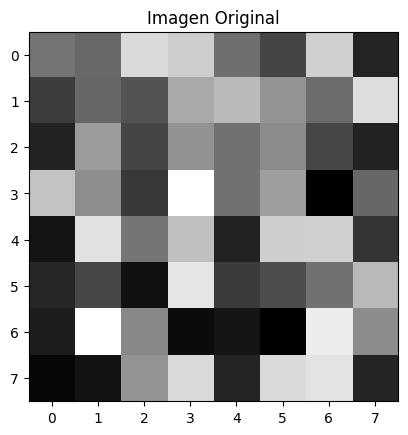

Tamaño de Imagen Original: 37 bytes

Encoded Data:
0010110001000001110111011101100100111111100100110110111111101011010001011101010110000100110100001001110010001101010101110011101000000011000101110111011110001010110010100001110111100101010000011111000110000001011011111111011001001101111011111001011110110010110001010111100111001010001101001111000000101001111100000100000100010111001101100100101101010001101001110010

TAMAÑO Encoded Data ->   46








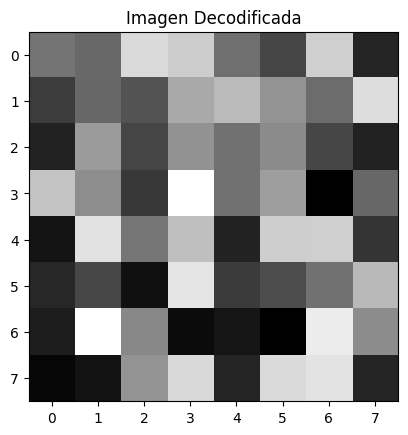

Tamaño de Imagen Decodificada: 37 bytes
Relación de Compresión: 0.46


In [27]:
import matplotlib.pyplot as plt


def get_bytes_size(data):
    return (len(data) + 7) // 8

def display_image_info(image, title):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.show()
    data_str = ''.join(map(str, image))
    data_size = get_bytes_size(data_str)
    print(f"Tamaño de {title}: {data_size} bytes")

image = [symbols[i:i+8] for i in range(0, 64, 8)]
display_image_info(image, "Imagen Original")

encoded_data = huffman_encode(image, huffman_codebook)

print("\nEncoded Data:")
print(encoded_data)


print("\nTAMAÑO Encoded Data ->  ",get_bytes_size(encoded_data))

print("\n")
print("\n")
print("\n")

decoded_image_2d = [decoded_image[i:i+8] for i in range(0, 64, 8)]
display_image_info(decoded_image_2d, "Imagen Decodificada")

original_size = get_bytes_size(''.join(map(str, symbols)))
compressed_size = get_bytes_size(encoded_data)
compression_ratio = original_size / compressed_size

print(f"Relación de Compresión: {compression_ratio:.2f}")